# Apple Stock Market Data Analysis

# Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import kagglehub

# Load Data 

In [ ]:
# Download latest version
path = kagglehub.dataset_download("itzusama/apple-stock-market-data-2020-2024")

print("Path to dataset files:", path)

In [3]:
print(os.listdir(path))  # Lists all files in the directory

['AAPL.csv']


In [4]:
# Assuming the dataset file is 'listings.csv'
file_path = os.path.join(path, 'AAPL.csv' )
apple_data = pd.read_csv(file_path, skiprows=[1])

In [5]:
# Check The First 5 Rows
apple_data.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,72.796013,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06,72.662712,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200


In [6]:
# View The Shape of The Data
apple_data.shape

(1237, 7)

In [7]:
# Get detailed info about the dataset
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1237 non-null   object 
 1   Adj Close  1237 non-null   float64
 2   Close      1237 non-null   float64
 3   High       1237 non-null   float64
 4   Low        1237 non-null   float64
 5   Open       1237 non-null   float64
 6   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.8+ KB


# Data Cleaning

In [8]:
# Checking For Missing Values
apple_data.isnull().sum()

Price        0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [9]:
# Rename the column 'Price' to 'Date'
apple_data.rename(columns={'Price': 'Date'}, inplace=True)

In [10]:
# Cross checking the Change Date
apple_data.head(1)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,72.796013,75.087502,75.150002,73.797501,74.059998,135480400


In [11]:
# Ensure the 'Date' column is a datetime format
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

# Exploratory Data Analysis (EDA) - Visualization of trends

**Open price**

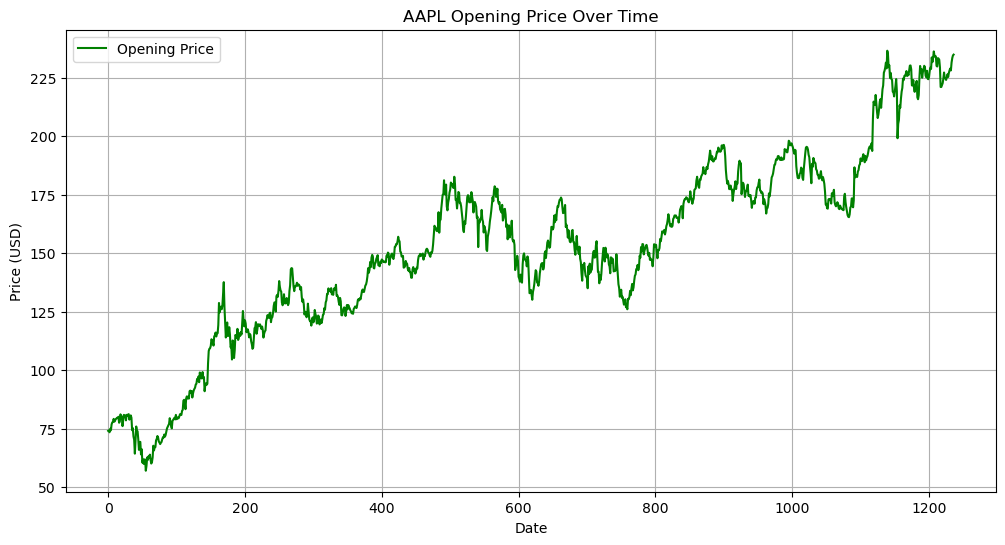

In [12]:
# Visualization: Opening Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data["Open"], label="Opening Price", color="green")
plt.title("AAPL Opening Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

**Open vs. Close Price**

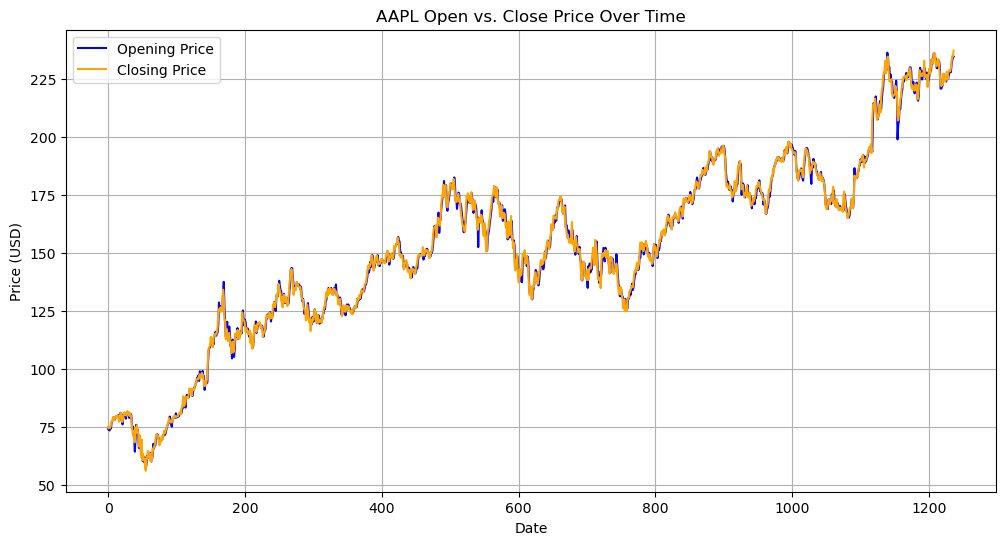

In [13]:
# Visualization: Open vs. Close Price
plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data['Open'], label="Opening Price", color="blue")
plt.plot(apple_data.index, apple_data['Close'], label="Closing Price", color="orange")
plt.title("AAPL Open vs. Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

**Close vs. Adj Close Price**

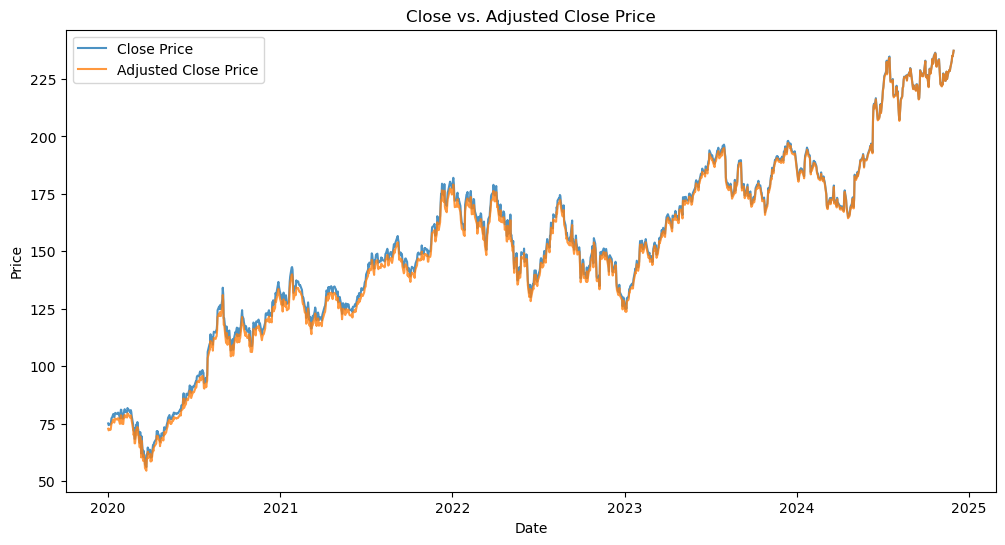

In [14]:
# Visualization: Close vs. Adj Close Price
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Date'], apple_data['Close'], label="Close Price", alpha=0.8)
plt.plot(apple_data['Date'], apple_data['Adj Close'], label="Adjusted Close Price", alpha=0.8)
plt.title("Close vs. Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

**Daily Returns**

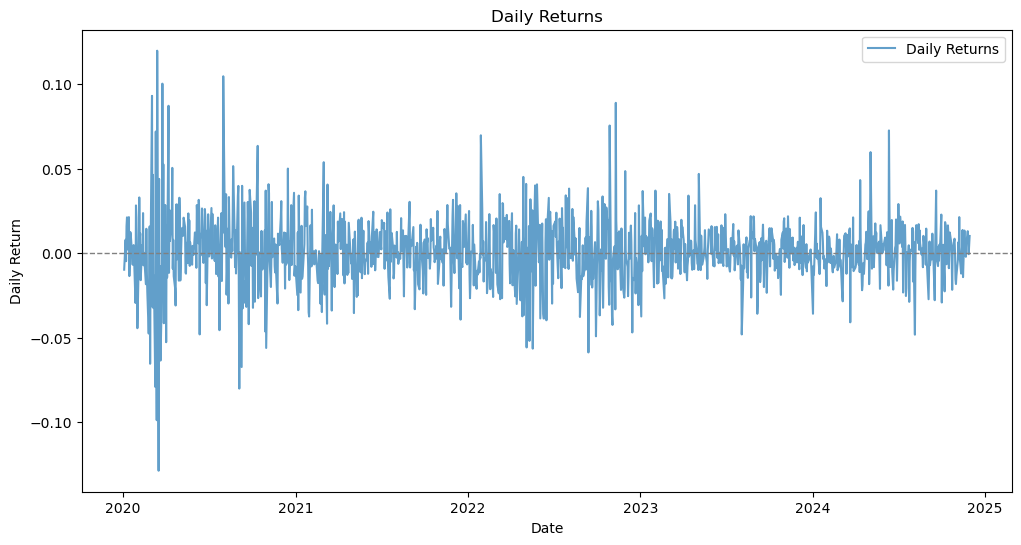

In [15]:
# Visualization: Daily Returns
apple_data['Daily Return'] = apple_data['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Date'], apple_data['Daily Return'], label="Daily Returns", alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

**Moving Averages (30-Day and 100-Day)**

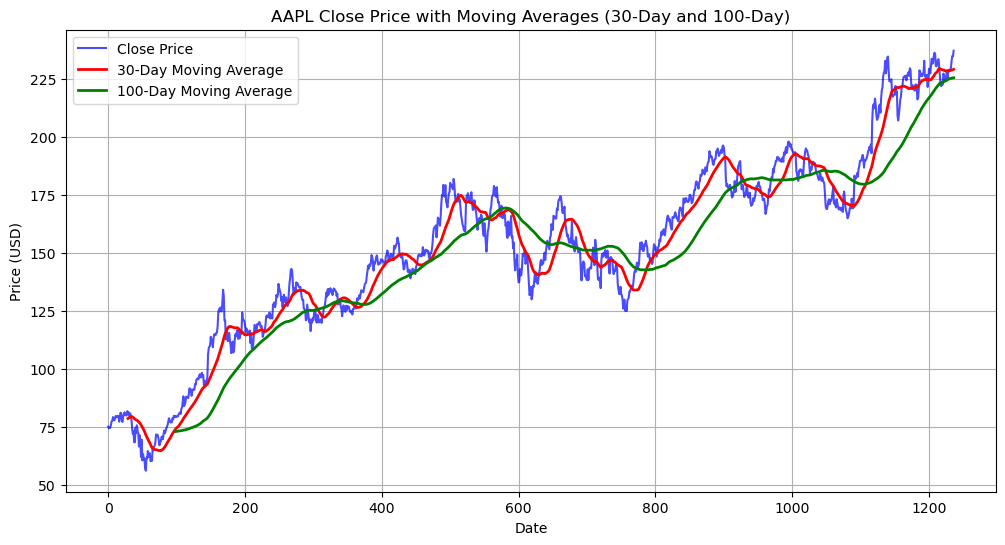

In [16]:
# Visualization: Moving Averages (30-Day and 100-Day)
apple_data["30-Day MA"] = apple_data["Close"].rolling(window=30).mean()
apple_data["100-Day MA"] = apple_data["Close"].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data["Close"], label="Close Price", color="blue", alpha=0.7)
plt.plot(apple_data.index, apple_data["30-Day MA"], label="30-Day Moving Average", color="red", linewidth=2)
plt.plot(apple_data.index, apple_data["100-Day MA"], label="100-Day Moving Average", color="green", linewidth=2)
plt.title("AAPL Close Price with Moving Averages (30-Day and 100-Day)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

**Daily Volatility**

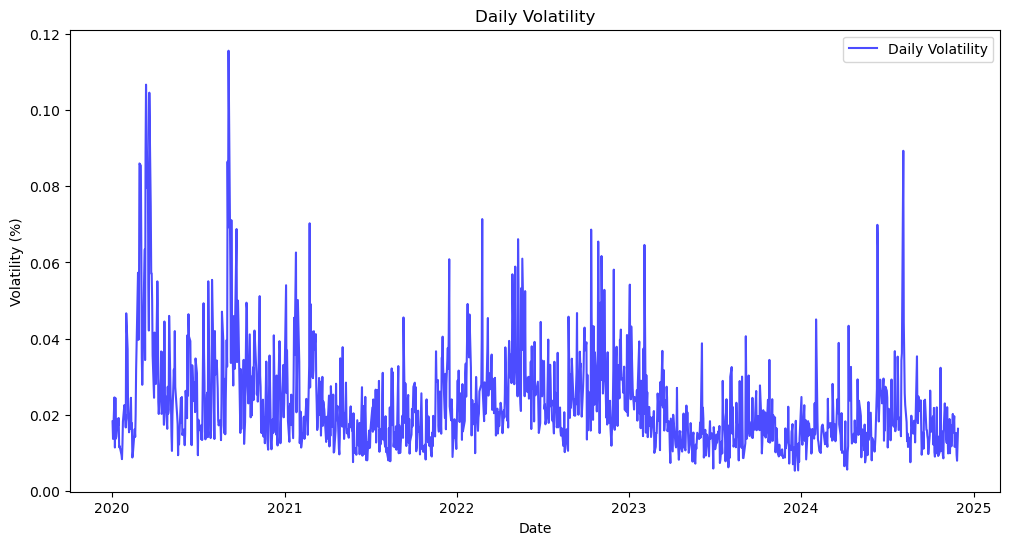

In [17]:
# Visualization: Daily Volatility
apple_data['Daily Volatility'] = (apple_data['High'] - apple_data['Low']) / apple_data['Low']
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Date'], apple_data['Daily Volatility'], label="Daily Volatility", color="blue", alpha=0.7)
plt.title("Daily Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.show()

**Daily and Cumulative Returns**

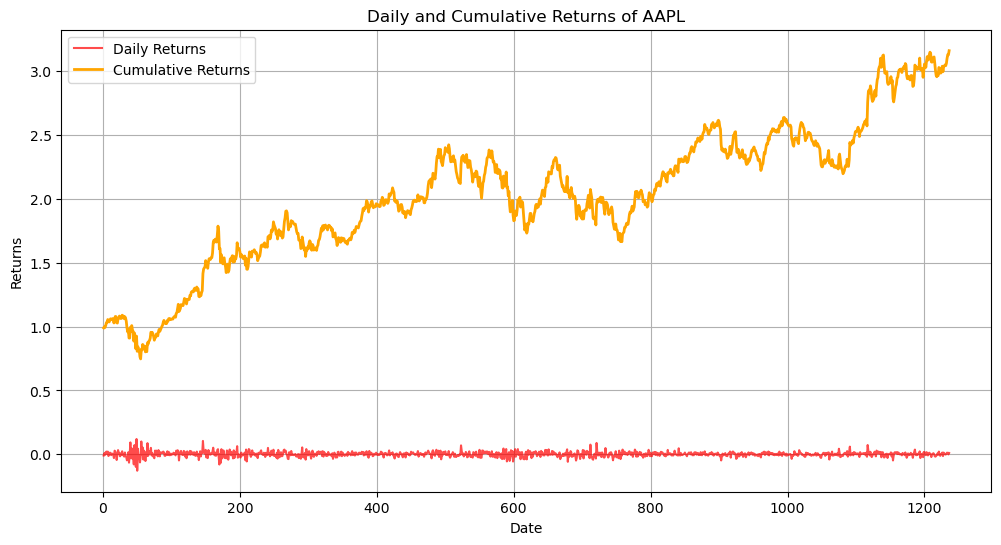

In [18]:
# Visualization: Daily and Cumulative Returns
apple_data["Cumulative Return"] = (1 + apple_data["Daily Return"]).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data["Daily Return"], label="Daily Returns", color="red", alpha=0.7)
plt.plot(apple_data.index, apple_data["Cumulative Return"], label="Cumulative Returns", color="orange", linewidth=2)
plt.title("Daily and Cumulative Returns of AAPL")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()

**Close Price vs. Volume**

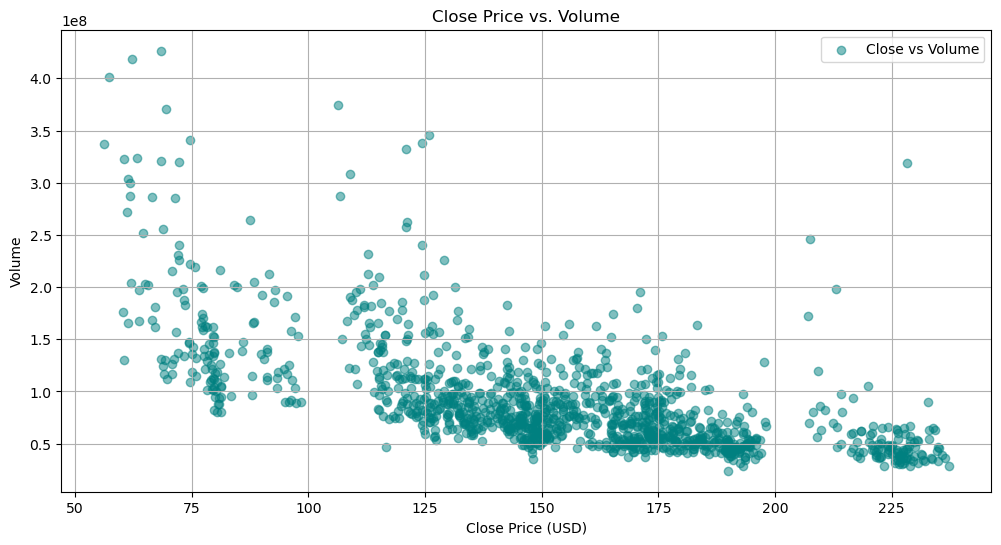

In [19]:
# Close Price vs. Volume
plt.figure(figsize=(12, 6))
plt.scatter(apple_data["Close"], apple_data["Volume"], alpha=0.5, label="Close vs Volume", color="teal")
plt.title("Close Price vs. Volume")
plt.xlabel("Close Price (USD)")
plt.ylabel("Volume")
plt.grid()
plt.legend()
plt.show()

**Buy/Sell Signals Based on SMA Crossovers**

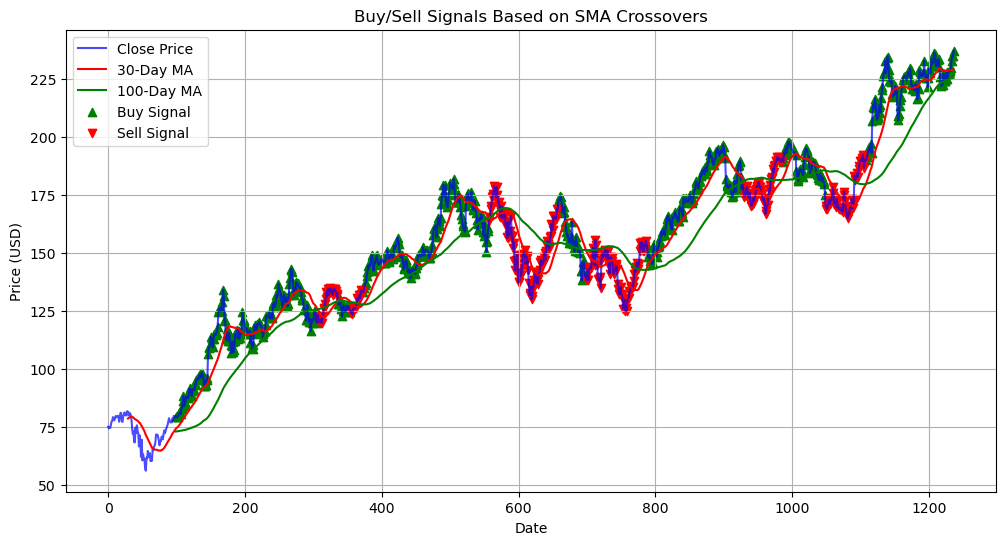

In [20]:
# Buy/Sell Signals Based on SMA Crossovers
apple_data["Signal"] = 0
apple_data.loc[apple_data["30-Day MA"] > apple_data["100-Day MA"], "Signal"] = 1
apple_data.loc[apple_data["30-Day MA"] <= apple_data["100-Day MA"], "Signal"] = -1

buy_signals = apple_data[apple_data["Signal"] == 1]
sell_signals = apple_data[apple_data["Signal"] == -1]

plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data["Close"], label="Close Price", color="blue", alpha=0.7)
plt.plot(apple_data.index, apple_data["30-Day MA"], label="30-Day MA", color="red")
plt.plot(apple_data.index, apple_data["100-Day MA"], label="100-Day MA", color="green")
plt.scatter(buy_signals.index, buy_signals["Close"], label="Buy Signal", marker="^", color="green", alpha=1)
plt.scatter(sell_signals.index, sell_signals["Close"], label="Sell Signal", marker="v", color="red", alpha=1)
plt.title("Buy/Sell Signals Based on SMA Crossovers")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


**30-Day Rolling Volatility**

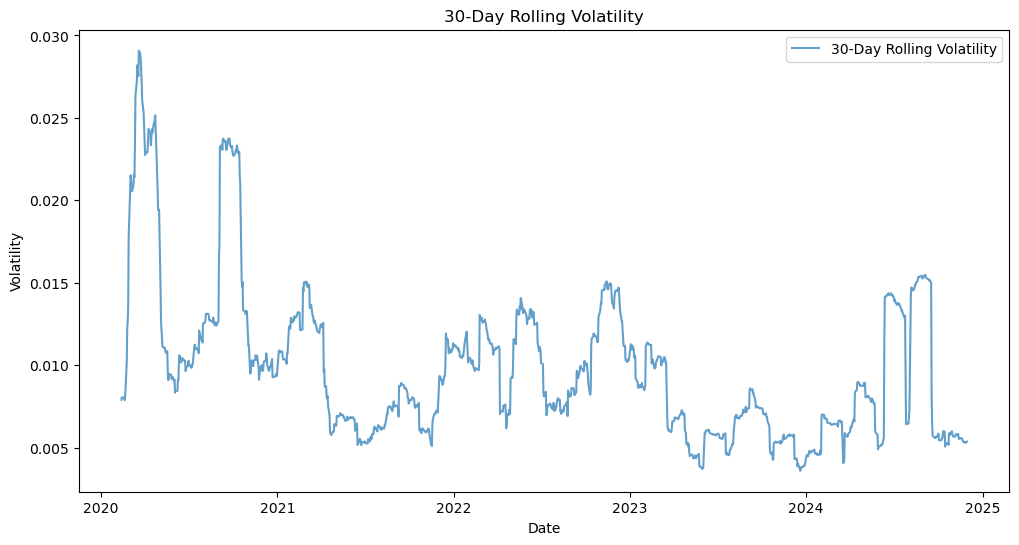

In [21]:
# Visualization: 30-Day Rolling Volatility
apple_data['30-Day Rolling Volatility'] = apple_data['Daily Volatility'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Date'], apple_data['30-Day Rolling Volatility'], label="30-Day Rolling Volatility", alpha=0.7)
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

**correlation Analysis**

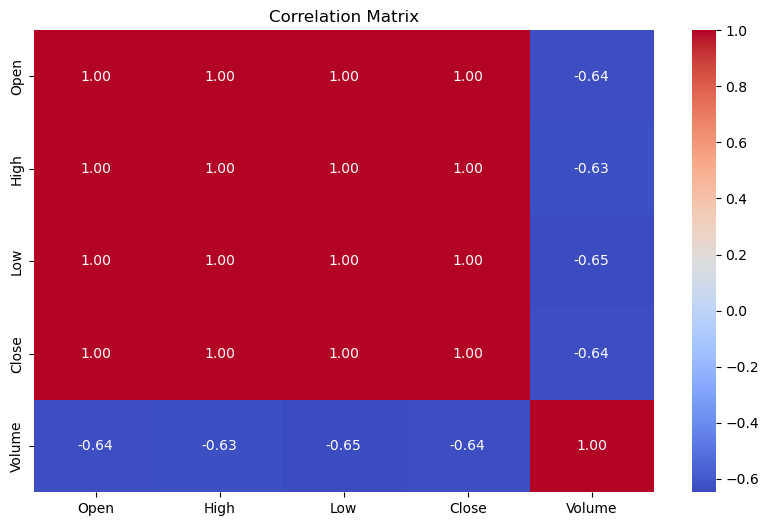

In [23]:
# Compute correlation matrix
correlation_matrix = apple_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()